<a href="https://colab.research.google.com/github/Shanb007/Customer-Retention-Analysis-for-Telecommuntication-Company/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

### Given a customer profile, this model should be able to predict how likely they are to churn or how likely they are to leave.

# **Importing Necessary Libraries**



The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

# **Data Loading and Cleaning**

Load and Prepare dataset.

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Check Numeric and Categorical Features**

Looking at the dataset, we can observe that the numerical values are represented as strings in some feature. Or the categorical values in some features might be represented as some other datatypes instead of strings. Hence it's good to check for the datatypes of all the features

In [ ]:
# IDENTIFYING NUMERICAL FEATURES
numeric_data = df.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns

print("Numeric Features:")
print(numeric_data.head())

Numeric Features:
   SeniorCitizen  tenure  MonthlyCharges
0              0       1           29.85
1              0      34           56.95
2              0       2           53.85
3              0      45           42.30
4              0       2           70.70


In [ ]:
# IDENTIFYING CATEGORICAL FEATURES
categorical_data = df.select_dtypes(exclude=np.number)
categorical_col = categorical_data.columns

print("Categorical Features:")
print(categorical_data.head())

Categorical Features:
   customerID  gender Partner  ...              PaymentMethod TotalCharges Churn
0  7590-VHVEG  Female     Yes  ...           Electronic check        29.85    No
1  5575-GNVDE    Male      No  ...               Mailed check       1889.5    No
2  3668-QPYBK    Male      No  ...               Mailed check       108.15   Yes
3  7795-CFOCW    Male      No  ...  Bank transfer (automatic)      1840.75    No
4  9237-HQITU  Female      No  ...           Electronic check       151.65   Yes

[5 rows x 18 columns]


# **CHECK THE DATATYPES OF ALL COLUMNS.**

In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


# **Data Preprocessing**



*   Converting TotalChargees column to float.
*   Attributing No internet service to No.
*   Attributing No phone service to No.
*   Attributing No phone service to No.





In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges']= df['TotalCharges'].astype(float)
no_internet_feats = [ 'TechSupport','OnlineBackup', 'DeviceProtection','StreamingTV','OnlineSecurity','StreamingMovies']

for i in no_internet_feats:
  df[i] = df[i].replace({'No internet service':'No'})

df['MultipleLines']=df['MultipleLines'].replace({'No phone service':'No'})
df['SeniorCitizen']= df['SeniorCitizen'].replace({0:'No', 1:'Yes'})

In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


# **Check for Class Imbalance**



In [ ]:
# we are finding the percentage of each class in the feature 'Churn'
class_values = (df['Churn'].value_counts()/df['Churn'].value_counts().sum())*100
print(class_values)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


# **Univariate analysis of Categorical columns**

We using Bar plots to represent the frequency of all the values in the categorical variables.

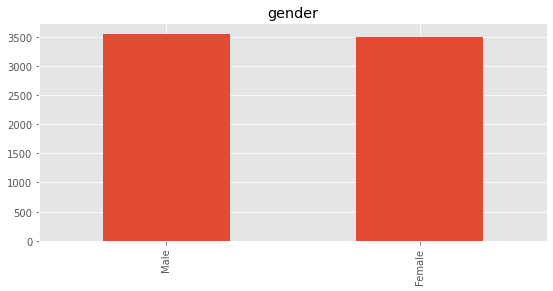

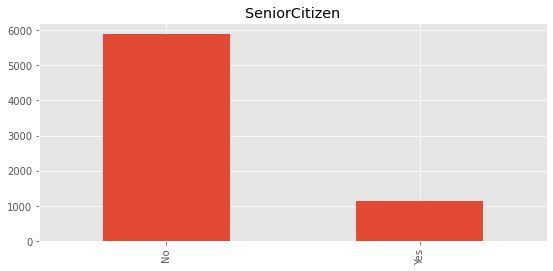

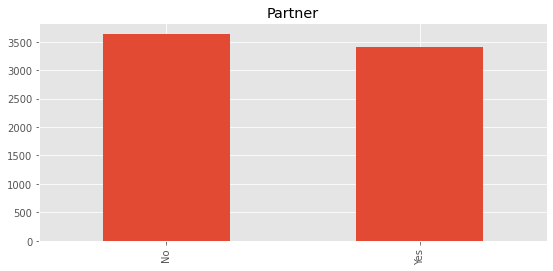

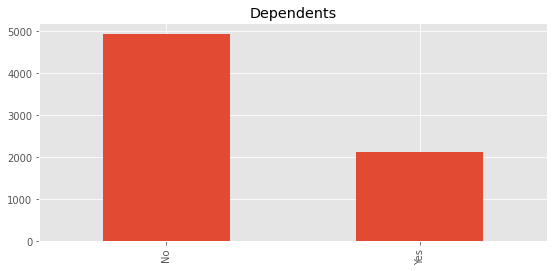

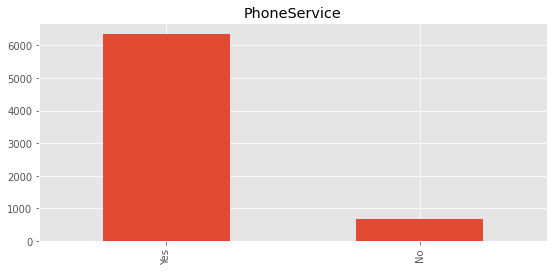

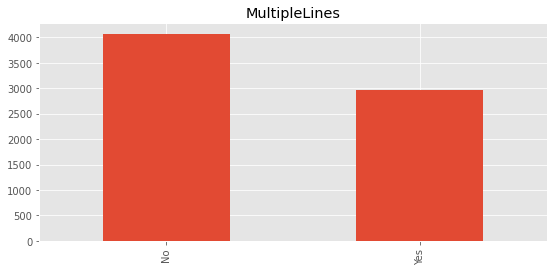

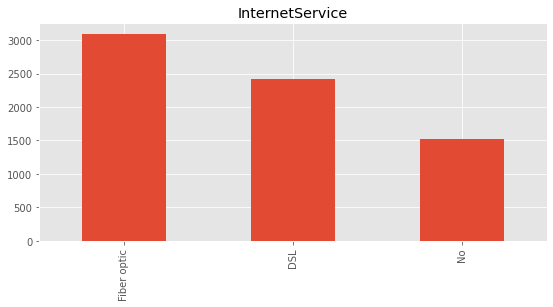

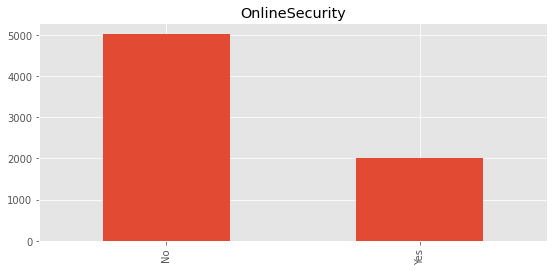

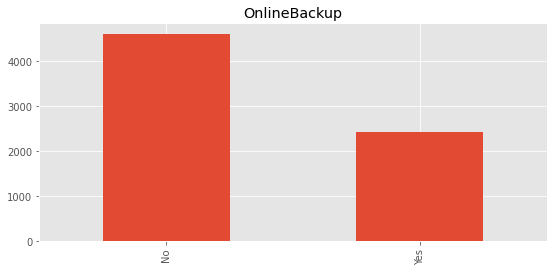

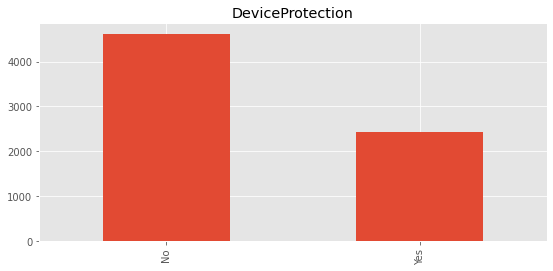

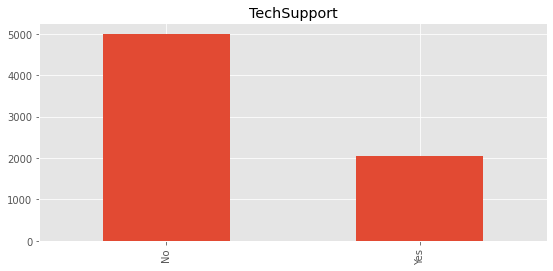

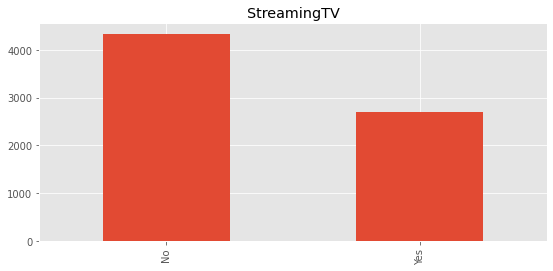

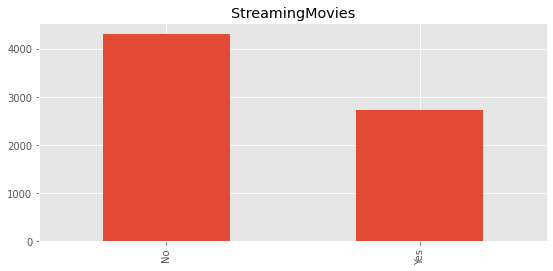

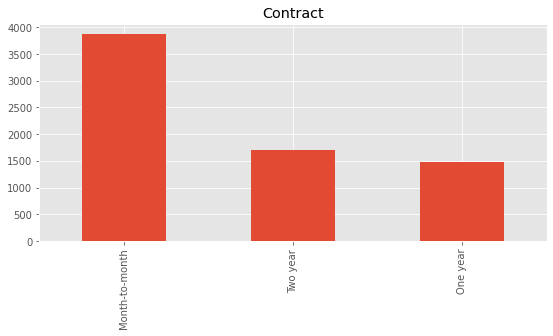

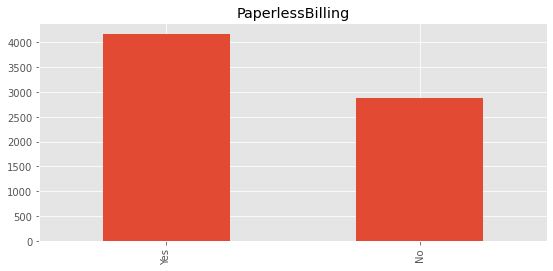

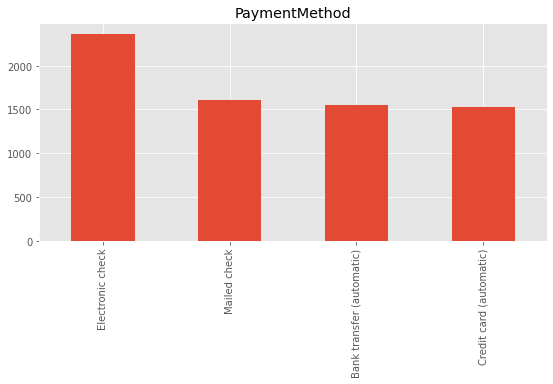

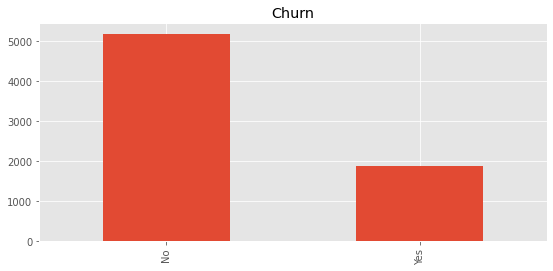

In [ ]:
# Selecting the categorical columns
categorical_col = df.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
for column in categorical_col:
  if column == 'customerID':
    continue
  else:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

# **Univariate analysis of Continuous columns**

We plot a histogram of all the continuous features.

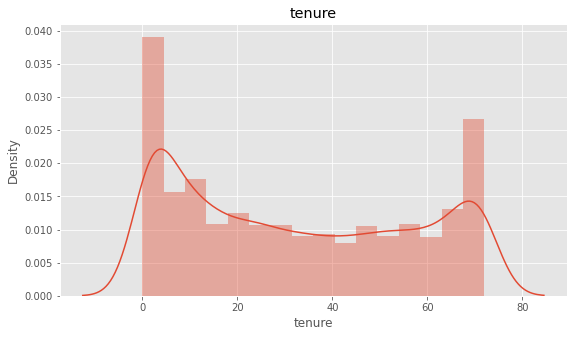

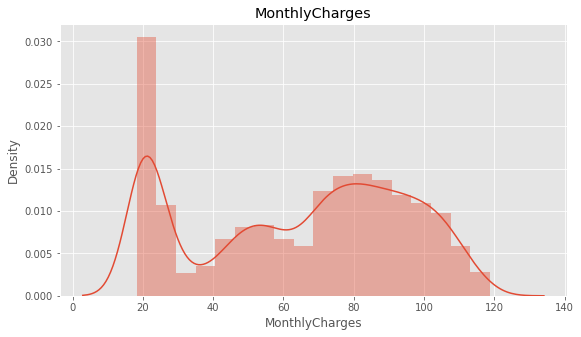

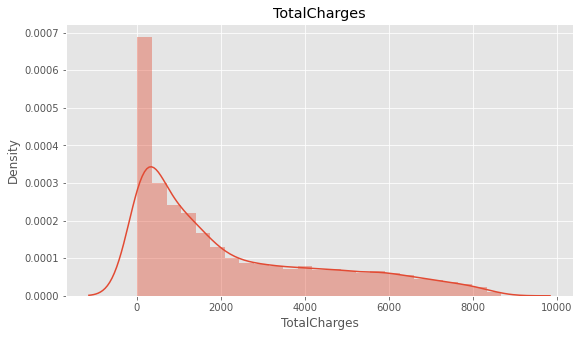

In [ ]:
numeric_col1 = df.select_dtypes(include=np.number).columns
for column in numeric_col1:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.distplot(df[column])
  plt.title(column)

# **Bivariate Analysis**

We plot every categorical feature against the target('Churn') by plotting a barchart.
To understand the relationship between the features.

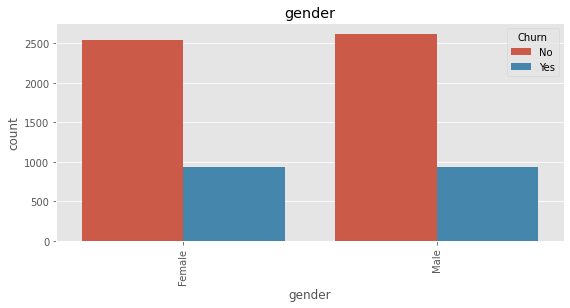

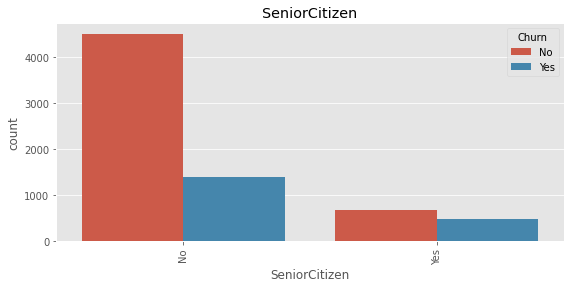

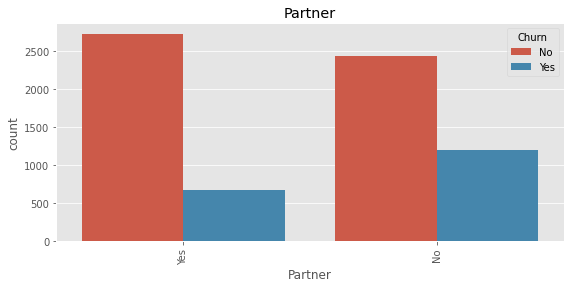

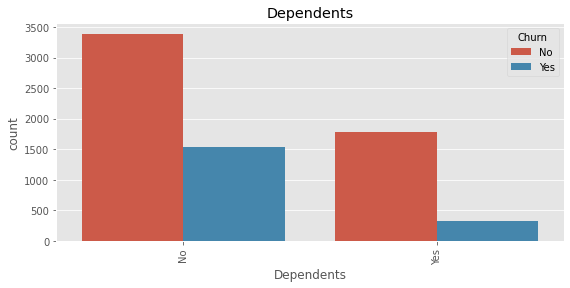

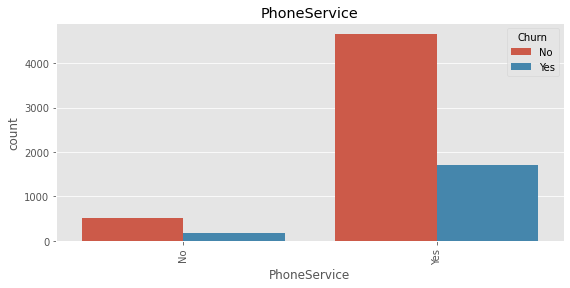

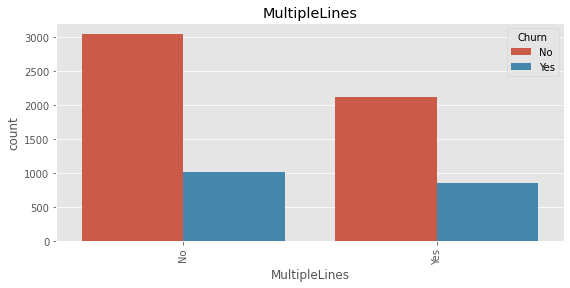

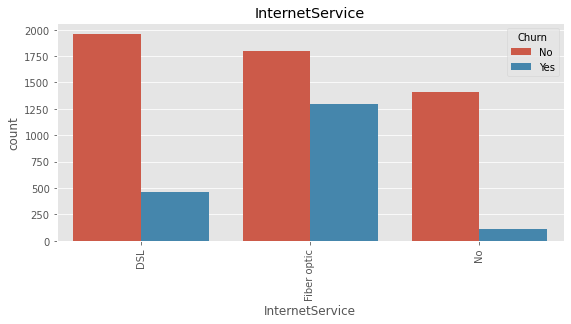

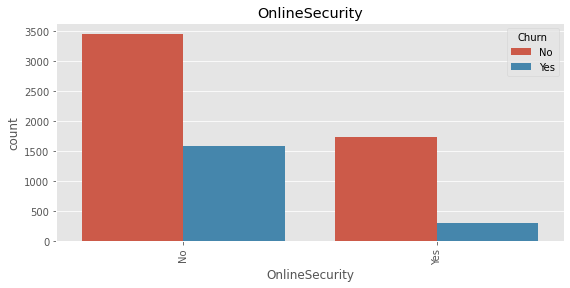

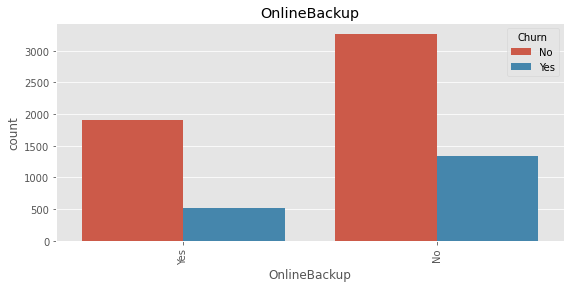

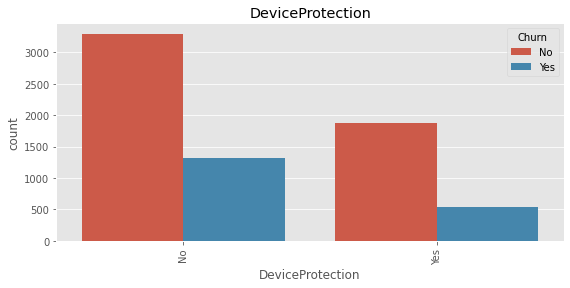

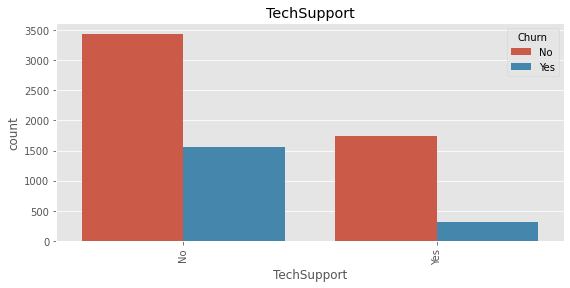

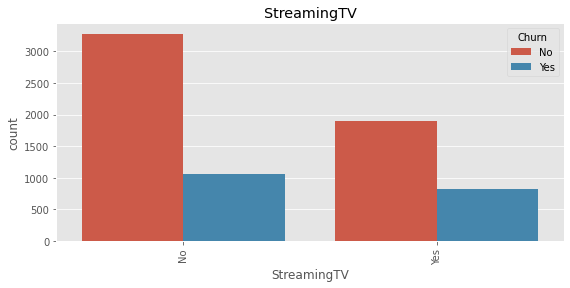

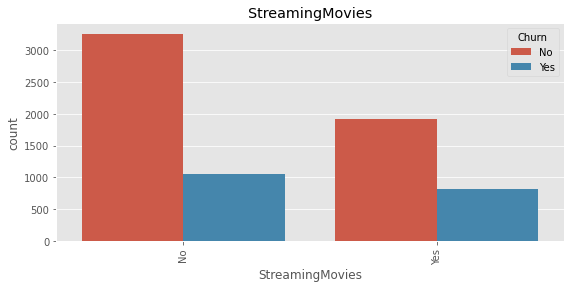

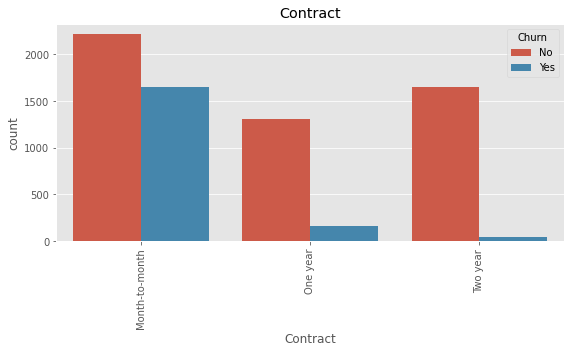

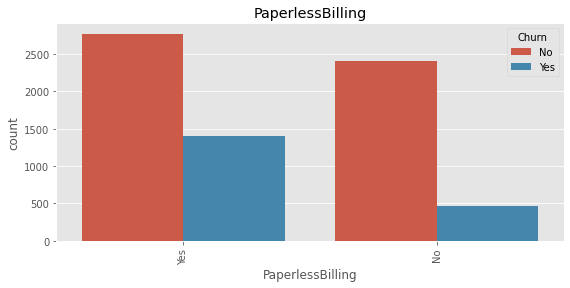

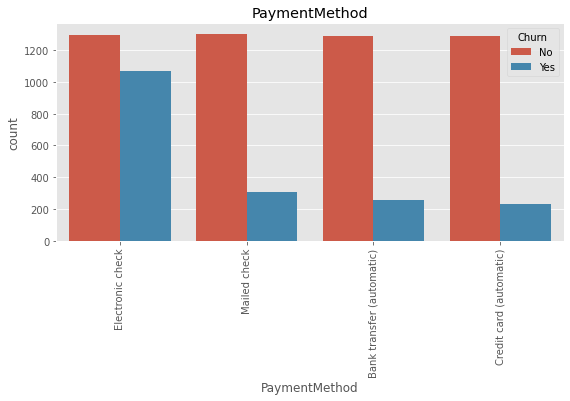

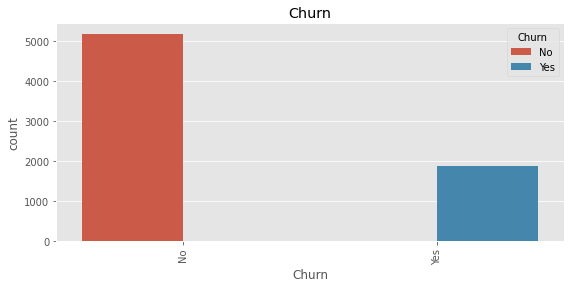

In [ ]:
for column in categorical_col:
  if column == 'customerID':
    continue
  else:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['Churn'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)

*Imputing missing values with mean should not produce significant shift to the overall distribution*

In [ ]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mode()[0])

# **Function to Label Encode Categorical variables**

In the code below we will perform label encoding on all the categorical features and also the target (since it is categorical) in the dataset. 

In [ ]:
df_c = df.copy()
df_c = df_c.drop(["customerID"],axis =1)

le = LabelEncoder()
for feature in categorical_col:
    try:
        df_c[feature] = le.fit_transform(df_c[feature])
    except:
        print('Error encoding '+feature)

Error encoding customerID


# **PREPARING THE TRAIN AND TEST DATA**

In [ ]:
# Predictors
X = df_c.iloc[:,:-1]
# Target
y = df_c.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# **Applying Different Models at Data.**

There are many Classification algorithms are present in machine learning, which are used for different classification applications. Some of the main classification algorithms are as follows that we use for our models:



*   Logistic Regression
*   Decision Tree
*   Random Forest
*   Gradient Boosting
*   XGBoost










ROC_AUC_SCORE is 0.73622799093488
------------------------------
Accuracy Score for the Test dataset: 0.8106956933270232
Accuracy Score for the Train dataset: 0.8020283975659229
------------------------------
The ROC_AUC PLOT: 


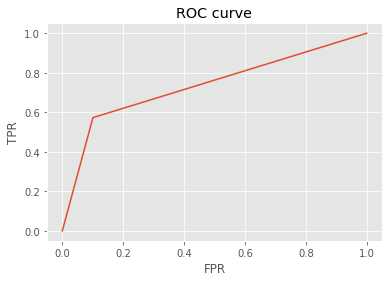

In [ ]:
#Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)
y_scores = model.predict(x_test)
auc = roc_auc_score(y_test, y_scores)
acc = accuracy_score(y_test,y_scores)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
y_scores_train = model.predict(x_train)
train_acc = accuracy_score(y_train,y_scores_train)

print('ROC_AUC_SCORE is',auc)
print("---"*10)
print('Accuracy Score for the Test dataset:',acc)
print('Accuracy Score for the Train dataset:',train_acc)
print("---"*10)
print("The ROC_AUC PLOT: ")

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6498925724428506
------------------------------
Accuracy Score for the Test dataset: 0.7255087553241836
Accuracy Score for the Train dataset: 0.9983772819472616
------------------------------
The ROC_AUC PLOT: 


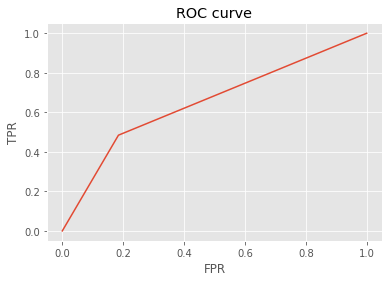

In [ ]:
#Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_scores = model.predict(x_test)
auc = roc_auc_score(y_test, y_scores)
acc = accuracy_score(y_test,y_scores)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
y_scores_train = model.predict(x_train)
train_acc = accuracy_score(y_train,y_scores_train)

print('ROC_AUC_SCORE is',auc)
print("---"*10)
print('Accuracy Score for the Test dataset:',acc)
print('Accuracy Score for the Train dataset:',train_acc)
print("---"*10)
print("The ROC_AUC PLOT: ")

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6967656268041378
------------------------------
Accuracy Score for the Test dataset: 0.7969711310932324
Accuracy Score for the Train dataset: 0.9983772819472616
------------------------------
The ROC_AUC PLOT: 


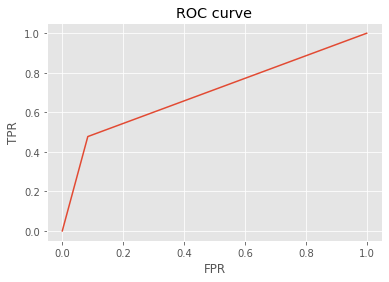

In [ ]:
#Random Forrest Classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_scores = model.predict(x_test)
auc = roc_auc_score(y_test, y_scores)
acc = accuracy_score(y_test,y_scores)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
y_scores_train = model.predict(x_train)
train_acc = accuracy_score(y_train,y_scores_train)

print('ROC_AUC_SCORE is',auc)
print("---"*10)
print('Accuracy Score for the Test dataset:',acc)
print('Accuracy Score for the Train dataset:',train_acc)
print("---"*10)
print("The ROC_AUC PLOT: ")

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.7132267208219284
------------------------------
Accuracy Score for the Test dataset: 0.8026502602934217
Accuracy Score for the Train dataset: 0.8251521298174442
------------------------------
The ROC_AUC PLOT: 


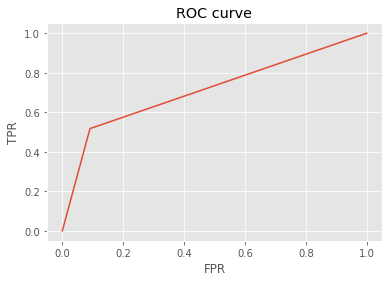

In [ ]:
#Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_scores = model.predict(x_test)
auc = roc_auc_score(y_test, y_scores)
acc = accuracy_score(y_test,y_scores)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
y_scores_train = model.predict(x_train)
train_acc = accuracy_score(y_train,y_scores_train)

print('ROC_AUC_SCORE is',auc)
print("---"*10)
print('Accuracy Score for the Test dataset:',acc)
print('Accuracy Score for the Train dataset:',train_acc)
print("---"*10)
print("The ROC_AUC PLOT: ")

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.7105099016737869
------------------------------
Accuracy Score for the Test dataset: 0.8002839564600095
Accuracy Score for the Train dataset: 0.8206896551724138
------------------------------
The ROC_AUC PLOT: 


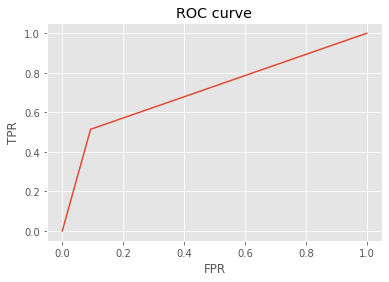

In [ ]:
#XGB Classifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_scores = model.predict(x_test)
auc = roc_auc_score(y_test, y_scores)
acc = accuracy_score(y_test,y_scores)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
y_scores_train = model.predict(x_train)
train_acc = accuracy_score(y_train,y_scores_train)

print('ROC_AUC_SCORE is',auc)
print("---"*10)
print('Accuracy Score for the Test dataset:',acc)
print('Accuracy Score for the Train dataset:',train_acc)
print("---"*10)
print("The ROC_AUC PLOT: ")

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# **Grid-Search & Hyperparameter Tuning**

In the below task, we write a code that performs hyperparameter tuning for a random forest classifier. We have used the hyperparameters max_features, max_depth, criterion, n-estimators, min_sample_split and min_sample_leaf for this task.

***Grid Search for Random Forest***

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
rfc = RandomForestClassifier()
param_grid = {'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 4, 6, 8], 'n_estimators' : [300, 400, 500],'min_samples_split' : [2, 4, 6, 8], 'min_samples_leaf' : [2, 3, 5, 7]}
grid_search_model = GridSearchCV(rfc, param_grid=param_grid, cv=3)
grid_search_model.fit(x_train, y_train)
print('Best Parameters are:',grid_search_model.best_params_)
#print('Best score: ', grid_search_model.best_score_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}


***Applying the best parameters obtained using Grid Search on Random Forest model***

We fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively.

Accuracy Score for the Test dataset: 0.7903454803596782
Accuracy Score for the Train dataset: 0.8206896551724138


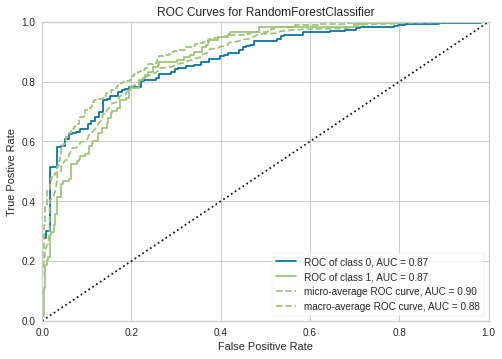

In [ ]:
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc

# A function to use smote
def grid_search_random_forest_best(dataframe,target):
  x_train,x_test,y_train,y_test = train_test_split(dataframe,target, test_size=0.3, random_state=42)
  # Applying Smote on train data for dealing with class imbalance
  smote = SMOTE()
  X_sm, y_sm =  smote.fit_sample(x_train, y_train)
  # Intializing the Random Forrest Classifier
  rfc = RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth = 8, min_samples_split = 4, min_samples_leaf = 3)
  rfc.fit(X_sm, y_sm)
  y_pred = rfc.predict(x_test)
  # Evaluation of result with the auc_roc graph
  visualizer = roc_auc(rfc,x_test,y_test)
  auc0 = roc_auc_score(y_test, y_pred)
  acc = accuracy_score(y_test,y_pred)
  print("Accuracy Score for the Test dataset:",acc)
  y_scores_train = model.predict(x_train)
  train_acc = accuracy_score(y_train,y_scores_train)
  print("Accuracy Score for the Train dataset:",train_acc)
grid_search_random_forest_best(X,y)